In [1]:
import numpy as np
import pandas as pd 
import scipy.io as sio
import matplotlib.pyplot as plt
from Baum_Welch_Algorithem import HMM_spike

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 5):
    from scipy.signal import butter, filtfilt
    #fs - sampling rate
    fa = 0.5 * fs
    low = lowcut/fa
    high = highcut/fa
    b,a = butter(order,[low, high], btype='band')
    y = filtfilt(b,a,data)
    return y

def draw_pic(data, long = 10, high = 10):
    x= data.shape[0]
    x_linspace = np.arange(0,x)
    #data = data - np.mean(data)
    plt.figure(figsize=(long,high))
    plt.plot(x_linspace,data)
    return

# Data1

In [2]:
file_name = 'E:\study\Doctor\second_year\EEG_data\eeg+steady+state+visual+evoked+potential+signals\A001SB1_1.csv'
df = pd.read_csv(file_name,encoding="utf-8")
df_list = df.values.tolist()
df_array = np.array(df.values)
df_data = df_array[:,2:]

In [3]:
exp_data = df_data[:2000,8]
#draw_pic(exp_data,20,10)

# Data2

In [2]:
data = sio.loadmat('E:/study/Doctor/second_year/EEG_data/UCLA_data/times_CSC4.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'inspk', 'cluster_class', 'par', 'spikes'])


In [20]:
print(data['par'])

[(array(['windows'], dtype='<U7'), array([[0]], dtype=uint8), array([[0.201]]), array([[0.01]]), array([[100]], dtype=uint8), array([[11]], dtype=uint8), array([[20]], dtype=uint8), array([[50]], dtype=uint8), array([[0.8]]), array([[13]], dtype=uint8), array(['data'], dtype='<U4'), array(['all'], dtype='<U3'), array([[0]], dtype=uint8), array([[32258.06451613]]), array([[20]], dtype=uint8), array([[44]], dtype=uint8), array([[48]], dtype=uint8), array([[5]], dtype=uint8), array([[30]], dtype=uint8), array([[300]], dtype=uint16), array([[3000]], dtype=uint16), array(['pos'], dtype='<U3'), array([[4]], dtype=uint8), array([[2]], dtype=uint8), array(['y'], dtype='<U1'), array([[10]], dtype=uint8), array([[4]], dtype=uint8), array(['wav'], dtype='<U3'), array([[3]], dtype=uint8), array([[10]], dtype=uint8), array([[10]], dtype=uint8), array(['center'], dtype='<U6'), array(['spk'], dtype='<U3'), array(['n'], dtype='<U1'), array([[20000]], dtype=uint16), array([[100]], dtype=uint8), array([

In [3]:
inspk = data['inspk']
cluster_class = data['cluster_class']
par = data['par']
spikes = data['spikes']
print(inspk.shape,cluster_class.shape,spikes.shape)

(9195, 10) (9195, 2) (9195, 64)


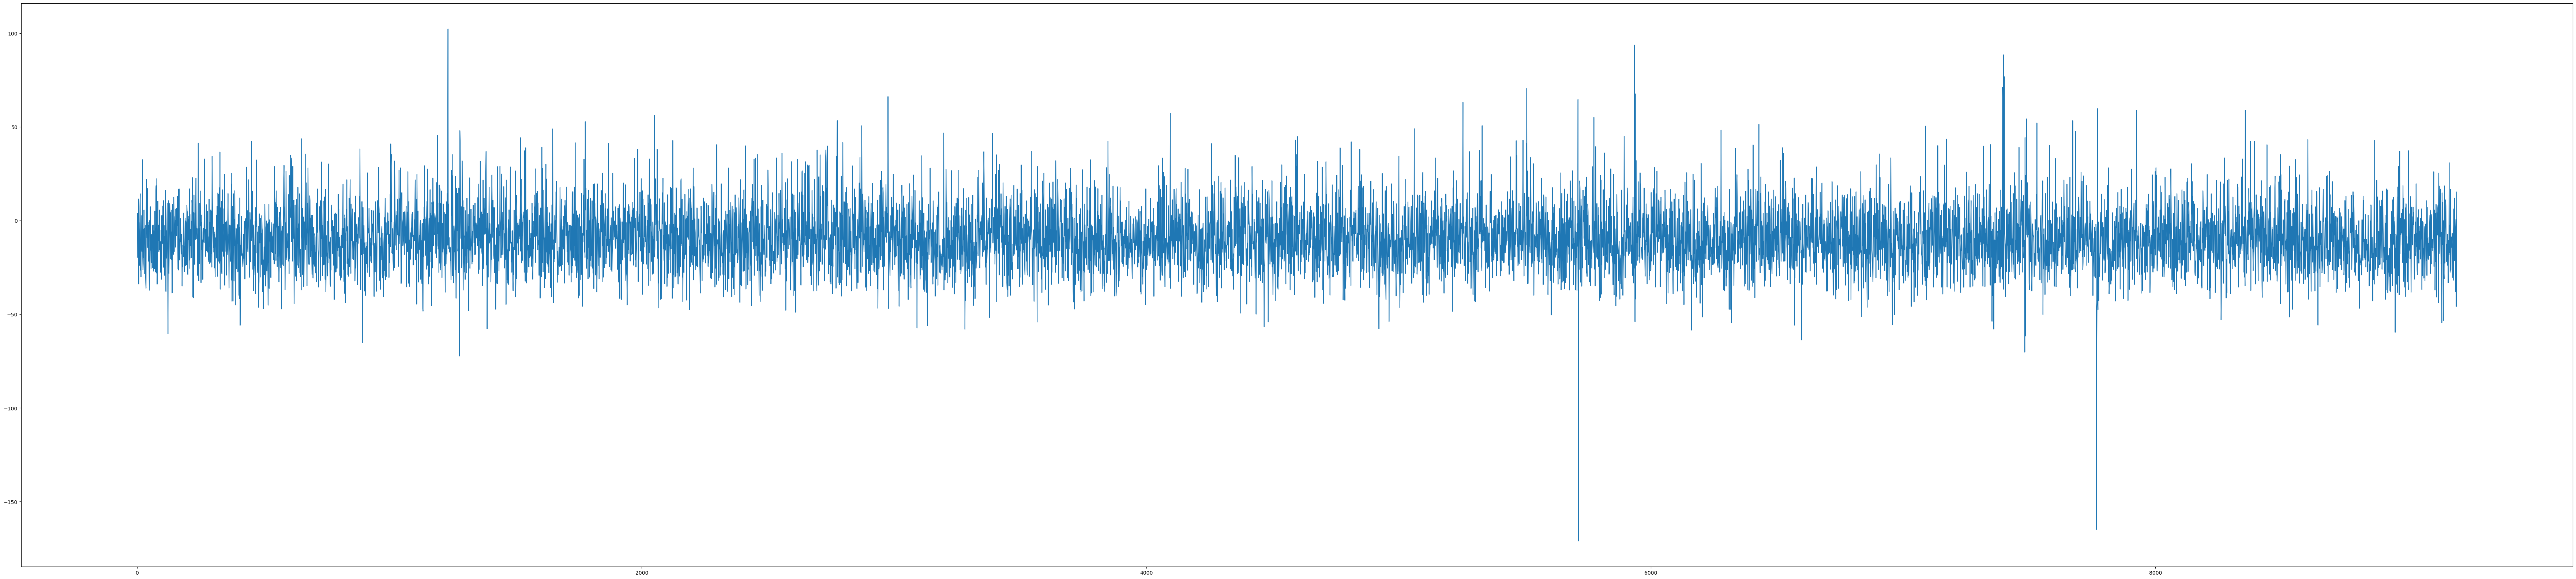

In [4]:
exp_data2 = spikes.T[1]
draw_pic(exp_data2,90,20)

9195


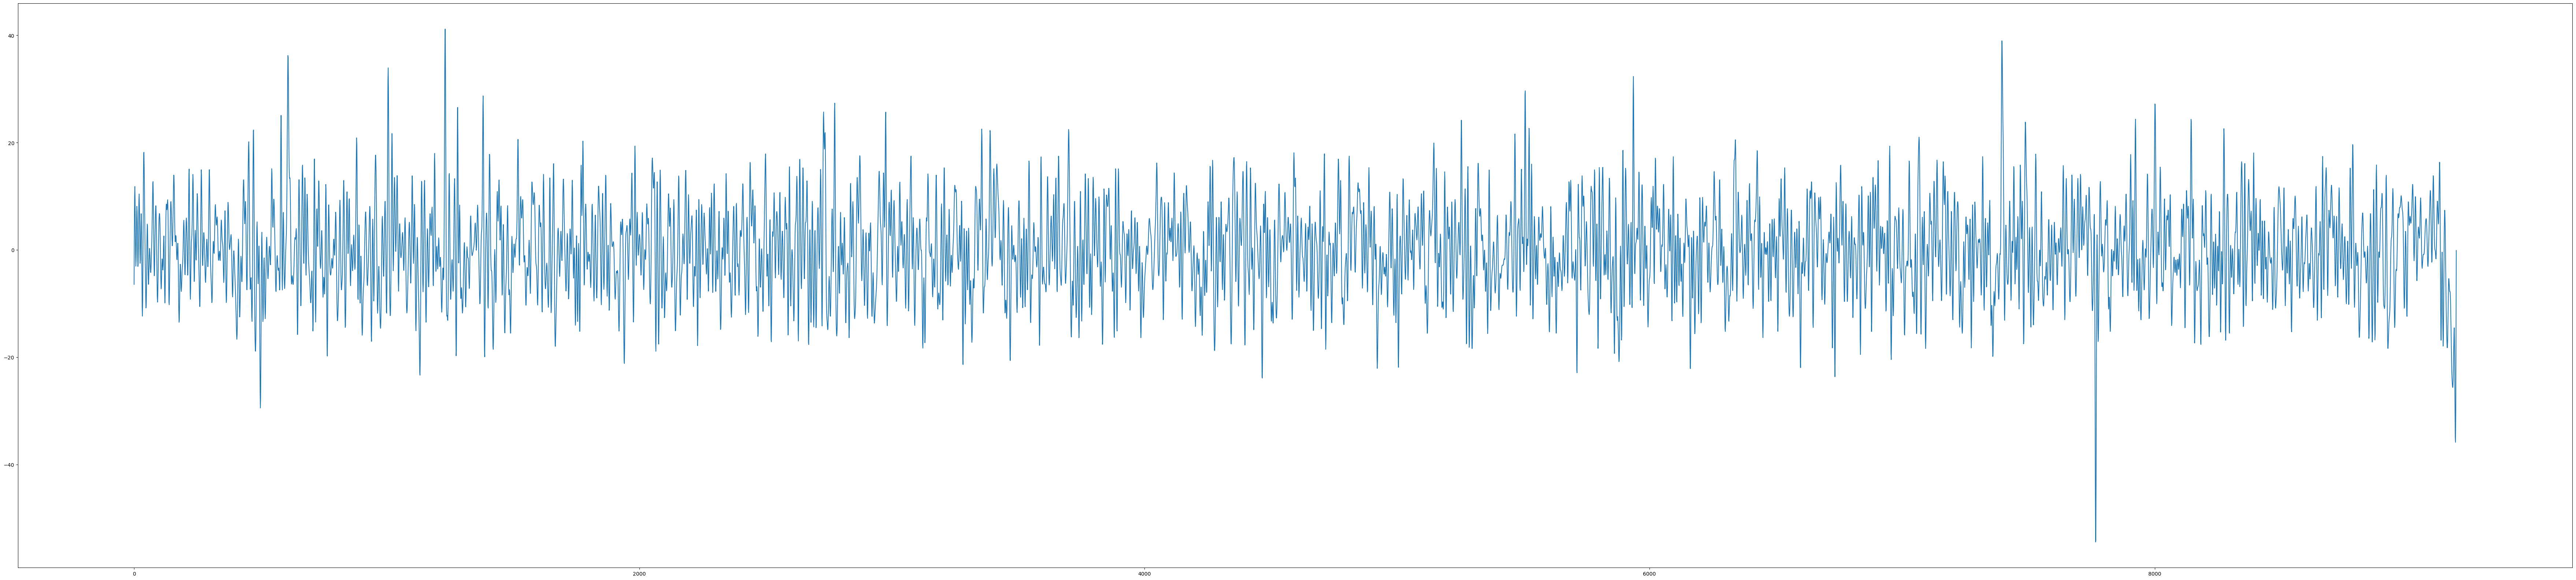

In [8]:
filtered_signal = butter_bandpass_filter(exp_data2,100,6000,48000)
print(len(filtered_signal))
draw_pic(filtered_signal,90,20)

# Data3

In [8]:
import gzip
from EEG_load_function import import_eeg_file

# Import data from one trial from participant 338 in control group
fc = gzip.open('E:/study/Doctor/second_year/EEG_data/eeg+database/smni_eeg_data/a_1_co2a0000364/co2a0000364.rd.000.gz', 'rb')
# Import data from one trial from one participant 364 in alcoholic group
fa = gzip.open('E:/study/Doctor/second_year/EEG_data/eeg+database/smni_eeg_data/a_1_co2a0000364/co2a0000364.rd.002.gz', 'rb')
dfc = import_eeg_file(fc)
dfa = import_eeg_file(fa)

In [9]:
dfc_list = dfc.values.tolist()
dfc_array = np.array(dfc.values)
exp_data3 = dfc_array[:,7]
#draw_pic(exp_data3,long = 20)

# Iteration

In [10]:
# The initial parameter seting
data = filtered_signal
K = 30
T = data.shape[0]
std = np.std(data)

In [11]:
cov = np.cov(data)
P = 10**(-3) 
# the templet computation
mu_sr = 24 * 10 ** 3
lins = np.linspace(0,3 * np.pi , num = mu_sr)
sinmu = np.sin(lins)
mu_linspace = np.zeros((K,1))

for i in range(5,14):
    mu_linspace[i,0] = sinmu[int((i-5) * mu_sr / 10)]

h_mu = np.random.uniform(0,5*std)
mu = mu_linspace * np.matrix(h_mu)
#print(mu)

In [12]:
#Initialization
h_mm = HMM_spike(mu,P,cov)

In [13]:
#iteration
h_mm.baum_welch_train(data)

In [14]:
a = h.stat_path(data)

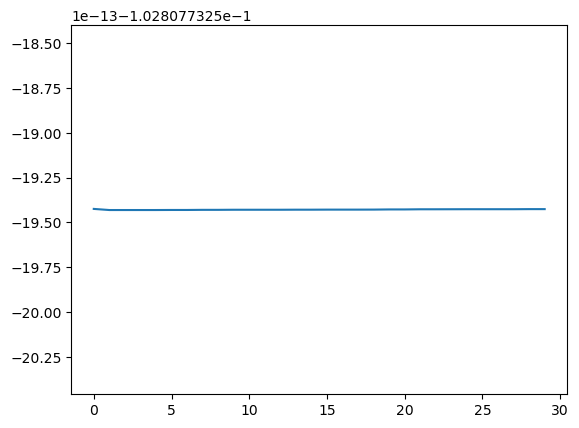

In [15]:
plt.plot(h_mm.mu)

In [16]:
h_mm.P

0.00048059208751772376